# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [9]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [10]:
mapping = {
    "RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay": 3,
}

df["trip_type"] = df["trip_type"].map(mapping)

In [11]:
df["trip_type"].unique()

array([1, 2, 3])

In [12]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [13]:
mapping = {
    "Internet": 1,
    "Mobile": 2,
}

df["sales_channel"] = df["sales_channel"].map(mapping)

In [14]:
df["sales_channel"].unique()

array([1, 2])

In [15]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,1.112360,1.017800,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,1.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,1.000000,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,1.000000,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,1.000000,1.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,2.000000,3.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## Data Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  # Ensures plots display in the notebook

UsageError: unrecognized arguments: # Ensures plots display in the notebook


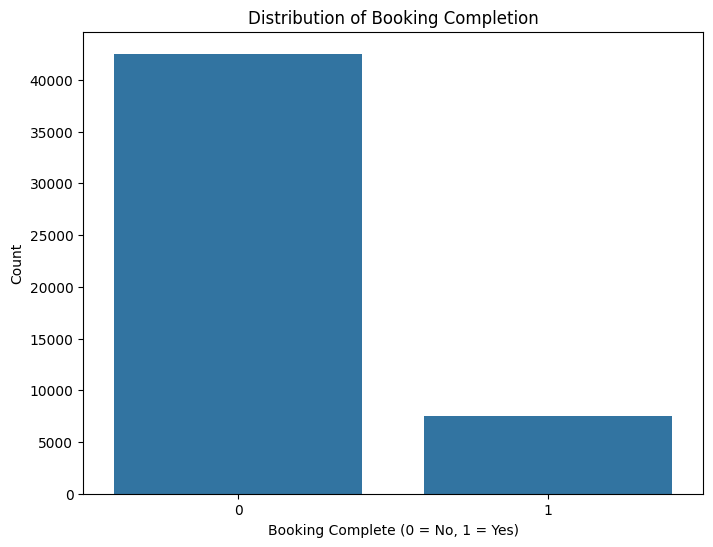

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='booking_complete', data=df)
plt.title('Distribution of Booking Completion')
plt.xlabel('Booking Complete (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

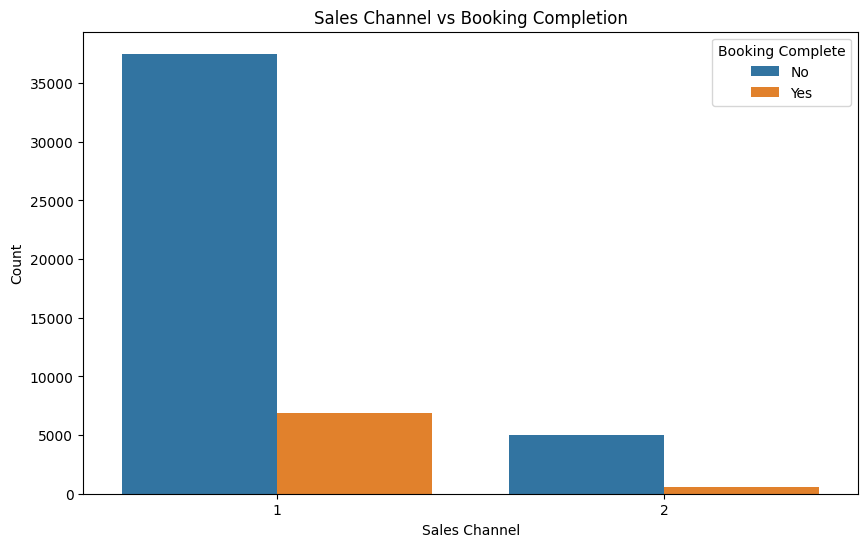

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sales_channel', hue='booking_complete', data=df)
plt.title('Sales Channel vs Booking Completion')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.legend(title='Booking Complete', labels=['No', 'Yes'])
plt.show()


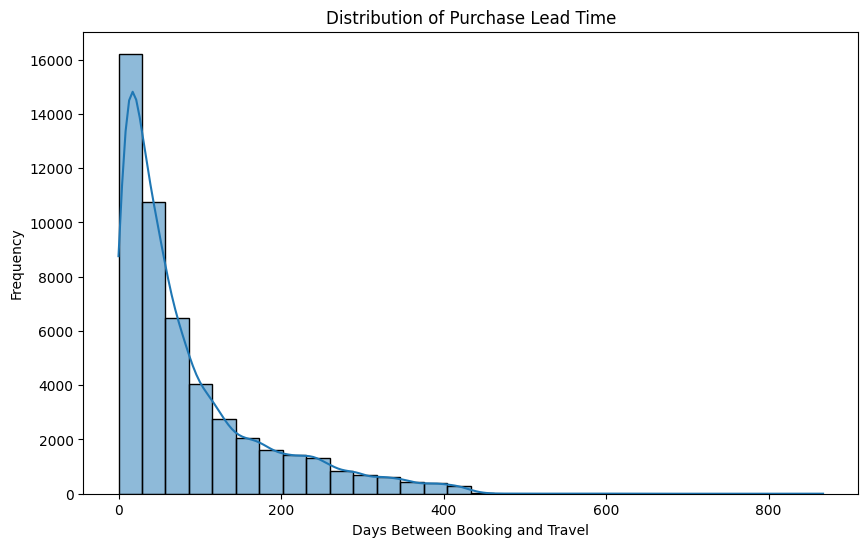

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['purchase_lead'], bins=30, kde=True)
plt.title('Distribution of Purchase Lead Time')
plt.xlabel('Days Between Booking and Travel')
plt.ylabel('Frequency')
plt.show()

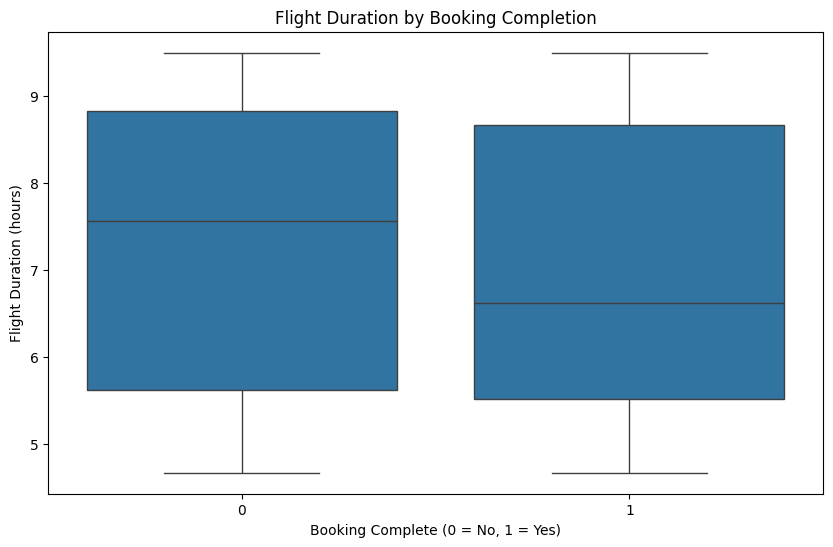

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_complete', y='flight_duration', data=df)
plt.title('Flight Duration by Booking Completion')
plt.xlabel('Booking Complete (0 = No, 1 = Yes)')
plt.ylabel('Flight Duration (hours)')
plt.show()

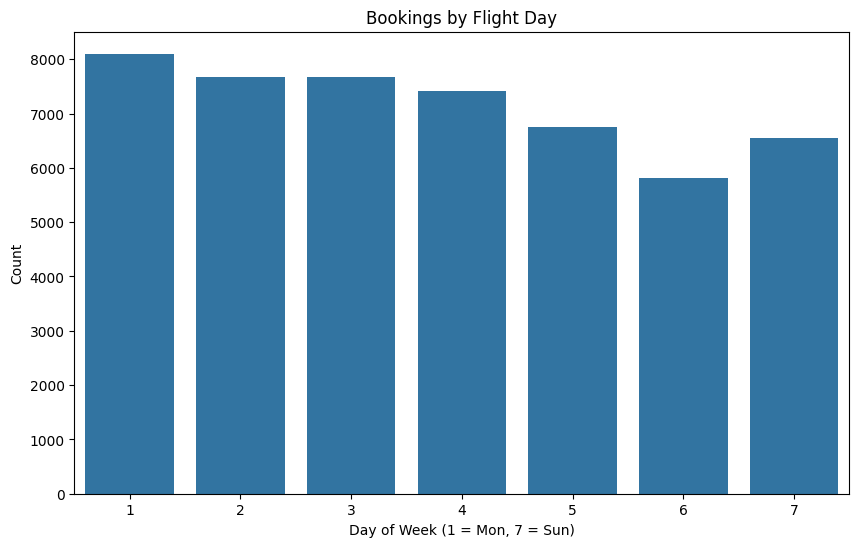

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='flight_day', data=df)
plt.title('Bookings by Flight Day')
plt.xlabel('Day of Week (1 = Mon, 7 = Sun)')
plt.ylabel('Count')
plt.show()

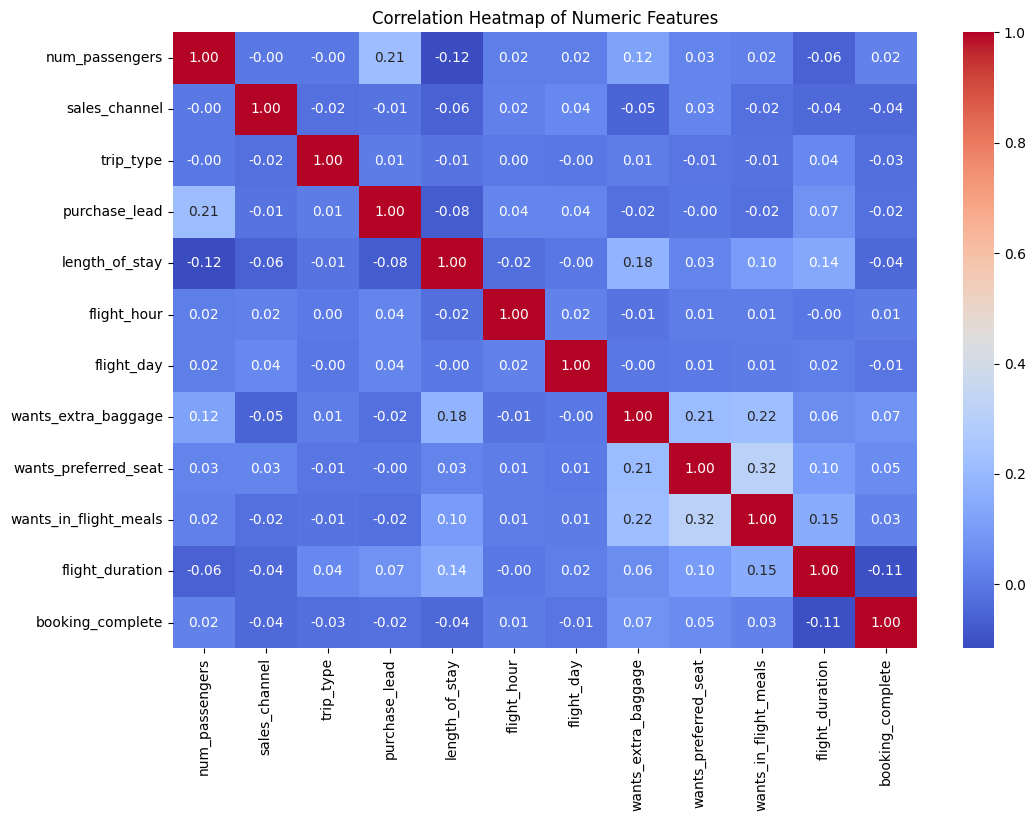

In [24]:
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [25]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 5.3+

In [27]:
df['booking_origin'].nunique()


104

In [28]:
# top_origins = df['booking_origin'].value_counts().index[:20]  # Top 20
# df['booking_origin'] = df['booking_origin'].apply(lambda x: x if x in top_origins else 'Other')
# df = pd.get_dummies(df, columns=['booking_origin'], drop_first=True)


In [29]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,1,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,1,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,1,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [30]:
freq_encoding = df['booking_origin'].value_counts(normalize=True)
df['booking_origin_freq'] = df['booking_origin'].map(freq_encoding)


In [31]:
df['booking_origin_freq']

,booking_origin_freq
0,0.02148
1,0.02148
2,0.02540
3,0.02148
4,0.02540
...,...
49995,0.35744
49996,0.35744
49997,0.35744
49998,0.35744


In [32]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_freq
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0.02148
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0.02148
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0.02540
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0.02148
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0.02540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,0.35744
49996,1,1,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,0.35744
49997,1,1,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,0.35744
49998,1,1,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,0.35744


In [33]:
obj_columns = df.select_dtypes(include=['object']).columns
print("Object columns being dropped:", obj_columns)

# Drop object-type columns
df_numeric = df.drop(columns=obj_columns)

Object columns being dropped: Index(['route', 'booking_origin'], dtype='object')


In [34]:
df_numeric

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_freq
0,2,1,1,262,19,7,6,1,0,0,5.52,0,0.02148
1,1,1,1,112,20,3,6,0,0,0,5.52,0,0.02148
2,2,1,1,243,22,17,3,1,1,0,5.52,0,0.02540
3,1,1,1,96,31,4,6,0,0,1,5.52,0,0.02148
4,2,1,1,68,22,15,3,1,0,1,5.52,0,0.02540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,1,0,1,5.62,0,0.35744
49996,1,1,1,111,6,4,7,0,0,0,5.62,0,0.35744
49997,1,1,1,24,6,22,6,0,0,1,5.62,0,0.35744
49998,1,1,1,15,6,11,1,1,0,1,5.62,0,0.35744


## Model Training

In [35]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = df_numeric.drop(columns=["booking_complete"])  # Drop target column
y = df_numeric["booking_complete"]  # Target variable

# Split into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (35000, 12), Testing set: (15000, 12)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naïve Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Voting Classifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC())
    ], voting='hard')
}

results = {}

# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }
    # Print evaluation metrics
    print(f" {name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted s

 Logistic Regression Performance:
Accuracy: 0.8523
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12784
           1       0.00      0.00      0.00      2216

    accuracy                           0.85     15000
   macro avg       0.43      0.50      0.46     15000
weighted avg       0.73      0.85      0.78     15000

--------------------------------------------------
 Decision Tree Performance:
Accuracy: 0.7716
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     12784
           1       0.26      0.30      0.28      2216

    accuracy                           0.77     15000
   macro avg       0.57      0.58      0.57     15000
weighted avg       0.78      0.77      0.78     15000

--------------------------------------------------
 Naïve Bayes Performance:
Accuracy: 0.7956
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     12

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

 Support Vector Machine Performance:
Accuracy: 0.8523
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12784
           1       0.00      0.00      0.00      2216

    accuracy                           0.85     15000
   macro avg       0.43      0.50      0.46     15000
weighted avg       0.73      0.85      0.78     15000

--------------------------------------------------
 K-Nearest Neighbors Performance:
Accuracy: 0.8363
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     12784
           1       0.27      0.06      0.10      2216

    accuracy                           0.84     15000
   macro avg       0.56      0.52      0.51     15000
weighted avg       0.77      0.84      0.79     15000

--------------------------------------------------
 Gradient Boosting Performance:
Accuracy: 0.8528
              precision    recall  f1-score   support

           0       0.85      1.00  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Voting Classifier Performance:
Accuracy: 0.8523
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12784
           1       0.00      0.00      0.00      2216

    accuracy                           0.85     15000
   macro avg       0.43      0.50      0.46     15000
weighted avg       0.73      0.85      0.78     15000

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [47]:
results

{'Logistic Regression': {'Accuracy': 0.8522666666666666,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0},
 'Decision Tree': {'Accuracy': 0.7716,
  'Precision': 0.2614353312302839,
  'Recall': 0.29918772563176893,
  'F1 Score': 0.27904040404040403},
 'Naïve Bayes': {'Accuracy': 0.7956,
  'Precision': 0.2617713004484305,
  'Recall': 0.21074007220216606,
  'F1 Score': 0.2335},
 'Random Forest': {'Accuracy': 0.8522,
  'Precision': 0.4988235294117647,
  'Recall': 0.09566787003610108,
  'F1 Score': 0.16054524801211661},
 'Support Vector Machine': {'Accuracy': 0.8522666666666666,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0},
 'K-Nearest Neighbors': {'Accuracy': 0.8363333333333334,
  'Precision': 0.26705653021442494,
  'Recall': 0.06182310469314079,
  'F1 Score': 0.10040307805056797},
 'Gradient Boosting': {'Accuracy': 0.8528,
  'Precision': 0.5571428571428572,
  'Recall': 0.01759927797833935,
  'F1 Score': 0.03412073490813648},
 'AdaBoost': {'Accuracy': 0.8522,
  'Precision

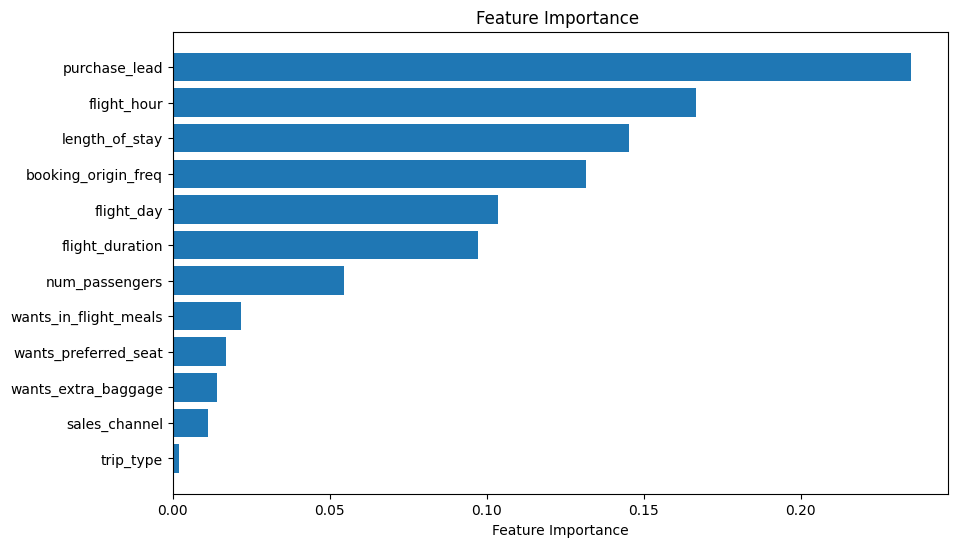

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Assume you have trained a Random Forest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.array(X_train.columns)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance ")
plt.show()

